In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import binned_statistic_2d

from astropy.visualization import simple_norm

1.2987012987012987
5.714285714285714 3.6363636363636362


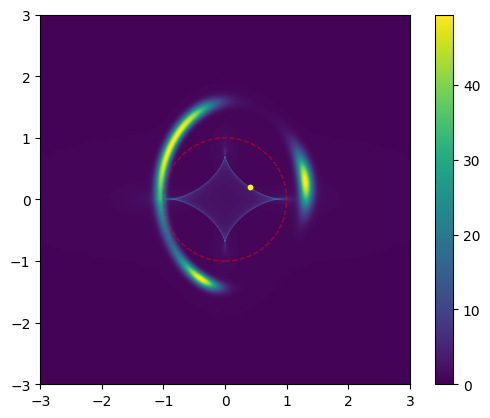

In [51]:
# Define the 2D Gaussian Function
def gaussian_2d(x, y, x0, y0, sigma):
    """
    Computes the 2D Gaussian function value at (x, y).

    Parameters:
    - x (float or np.ndarray): X-coordinate(s).
    - y (float or np.ndarray): Y-coordinate(s).
    - x0 (float): X-coordinate of the Gaussian center.
    - y0 (float): Y-coordinate of the Gaussian center.
    - sigma (float): Standard deviation of the Gaussian.

    Returns:
    - value (float or np.ndarray): Gaussian function value(s) at the given coordinate(s).
    """
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

theta_E = 2.0
kappa = 0.2/theta_E
gamma = 0.2
size = 1000
mu = 1.0/abs((1.0-kappa)**2-gamma**2)
print(mu)
range_x = 4 * mu * abs(1.0 - kappa + gamma)
range_y = 4 * mu * abs(1.0 - kappa - gamma)

source_size = 1000
source_range_x = 3
source_range_y = 3

print(range_x, range_y)

image_range_x = (-range_x, range_x)
image_range_y = (-range_y, range_y)

theta_x = np.linspace(*image_range_x, size)
theta_y = np.linspace(*image_range_y, size)
theta_x, theta_y = np.meshgrid(theta_x, theta_y)
theta_square = theta_x**2 + theta_y**2

beta_x = theta_x - ((theta_E**2 * theta_x) / theta_square + gamma * theta_x)
beta_y = theta_y - ((theta_E**2 * theta_y) / theta_square - gamma * theta_y)

magnification_map, x_edges, y_edges = np.histogram2d(
    beta_x.flatten(), beta_y.flatten(), 
    bins=(source_size, source_size), 
    range=((-source_range_x, source_range_x), (-source_range_y, source_range_y))
    )

xs = 0.4
ys = 0.2

gauss_image = gaussian_2d(beta_x.flatten(), beta_y.flatten(), 
                          xs, ys, sigma=0.2)
gauss_image = 50 * gauss_image.reshape(size, size)

image = magnification_map + gauss_image
norm = simple_norm(image, stretch='linear', percent=99.9)
plt.imshow(image, origin='lower', 
           norm=norm, 
           extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]))
plt.colorbar()
e = Ellipse(xy=(0, 0), width=theta_E, height=theta_E, edgecolor='r', 
            fc='None', lw=1, ls='--', alpha=0.5)
plt.gca().add_patch(e)
plt.scatter(xs, ys, c='yellow', s=10)

plt.show()


In [12]:
# Define the 2D Gaussian Function
def gaussian_2d(x, y, x0, y0, sigma):
    """
    Computes the 2D Gaussian function value at (x, y).

    Parameters:
    - x (float or np.ndarray): X-coordinate(s).
    - y (float or np.ndarray): Y-coordinate(s).
    - x0 (float): X-coordinate of the Gaussian center.
    - y0 (float): Y-coordinate of the Gaussian center.
    - sigma (float): Standard deviation of the Gaussian.

    Returns:
    - value (float or np.ndarray): Gaussian function value(s) at the given coordinate(s).
    """
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

def summarize_values_sum(coords, data):
    """
    Fetch values from a 2D data array based on floating-point coordinates with (0,0) at center
    and compute their sum. Coordinates are rounded to the nearest integer.

    Parameters:
    - coords (np.ndarray): A [2, n] array of (x, y) coordinates as floats.
    - data (np.ndarray): A 2D array from which to fetch values.

    Returns:
    - total_sum (float): The sum of fetched values.
    """
    if coords.shape[0] != 2:
        raise ValueError("Coordinates array must have shape [2, n].")
    
    x_coords_float, y_coords_float = coords
    
    # Determine the center of the data array
    center_y = data.shape[0] // 2
    center_x = data.shape[1] // 2
    # print(f"Data array center at (x, y): ({center_x}, {center_y})")
    
    # Convert float coordinates to nearest integer indices relative to center
    x_coords_int = np.rint(x_coords_float).astype(int)
    y_coords_int = np.rint(y_coords_float).astype(int)
    
    # print("Original float coordinates:")
    # print("x:", x_coords_float)
    # print("y:", y_coords_float)
    
    # Map (x, y) to array indices (i, j)
    # In NumPy, the first dimension is y (rows), and the second is x (columns)
    # Positive y moves upward (decreasing row index), positive x moves right (increasing column index)
    i_indices = center_y - y_coords_int
    j_indices = center_x + x_coords_int
    
    # print("Converted integer coordinates relative to center:")
    # print("i (row indices):", i_indices)
    # print("j (column indices):", j_indices)
    
    # Handle out-of-bounds by clipping
    max_i, max_j = data.shape[0] - 1, data.shape[1] - 1
    i_indices_clipped = np.clip(i_indices, 0, max_i)
    j_indices_clipped = np.clip(j_indices, 0, max_j)
    
    # if not np.array_equal(i_indices, i_indices_clipped) or not np.array_equal(j_indices, j_indices_clipped):
    #     print("Some coordinates were out of bounds and have been clipped.")
    
    # Fetch the values using advanced indexing
    fetched_values = data[i_indices_clipped, j_indices_clipped]
    
    # print("Fetched values:", fetched_values)
    
    # Compute the sum of fetched values
    # total_sum = np.sum(fetched_values)
    
    return fetched_values

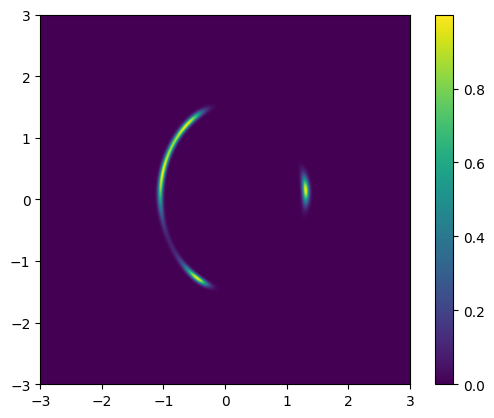

In [28]:
gauss_image = gaussian_2d(beta_x.flatten(), beta_y.flatten(), 0.4, 0.1, 0.1)
gauss_image = gauss_image.reshape(size, size)
# plt.imashow(gauss_image)
norm = simple_norm(gauss_image, stretch='linear')
plt.imshow(gauss_image, origin='lower', 
           norm=norm, 
           extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]))
plt.colorbar()
plt.show()


In [10]:
import numpy as np
from scipy.ndimage import map_coordinates

# Example Setup
# -----------------

# Define the data array (for example, a 7x7 grid for better symmetry around center)
data = np.array([
    [0.0,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6],
    [10.0, 11.1, 12.2, 13.3, 14.4, 15.5, 16.6],
    [20.0, 21.1, 22.2, 23.3, 24.4, 25.5, 26.6],
    [30.0, 31.1, 32.2, 33.3, 34.4, 35.5, 36.6],
    [40.0, 41.1, 42.2, 43.3, 44.4, 45.5, 46.6],
    [50.0, 51.1, 52.2, 53.3, 54.4, 55.5, 56.6],
    [60.0, 61.1, 62.2, 63.3, 64.4, 65.5, 66.6]
])


# Suppose you have n points
n = 5

# Define the coordinates array with shape [2, n]
# Each column represents a (x, y) coordinate as floats, including negative values
coords = np.array([
    [1.2, -2.7, 3.5, -4.1, 5.9],  # x-coordinates (floats)
    [-5.8, 4.3, -3.6, 2.2, -1.9]  # y-coordinates (floats)
])

# Function to Summarize Values by Sum with Float Coordinates and Centered System
# -----------------

def summarize_values_sum(coords, data):
    """
    Fetch values from a 2D data array based on floating-point coordinates with (0,0) at center
    and compute their sum. Coordinates are rounded to the nearest integer.

    Parameters:
    - coords (np.ndarray): A [2, n] array of (x, y) coordinates as floats.
    - data (np.ndarray): A 2D array from which to fetch values.

    Returns:
    - total_sum (float): The sum of fetched values.
    """
    if coords.shape[0] != 2:
        raise ValueError("Coordinates array must have shape [2, n].")
    
    x_coords_float, y_coords_float = coords
    n_points = coords.shape[1]
    
    # Determine the center of the data array
    center_y = data.shape[0] // 2
    center_x = data.shape[1] // 2
    print(f"Data array center at (x, y): ({center_x}, {center_y})")
    
    # Convert float coordinates to nearest integer indices relative to center
    x_coords_int = np.rint(x_coords_float).astype(int)
    y_coords_int = np.rint(y_coords_float).astype(int)
    
    print("Original float coordinates:")
    print("x:", x_coords_float)
    print("y:", y_coords_float)
    
    # Map (x, y) to array indices (i, j)
    # In NumPy, the first dimension is y (rows), and the second is x (columns)
    # Positive y moves upward (decreasing row index), positive x moves right (increasing column index)
    i_indices = center_y - y_coords_int
    j_indices = center_x + x_coords_int
    
    print("Converted integer coordinates relative to center:")
    print("i (row indices):", i_indices)
    print("j (column indices):", j_indices)
    
    # Handle out-of-bounds by clipping
    max_i, max_j = data.shape[0] - 1, data.shape[1] - 1
    i_indices_clipped = np.clip(i_indices, 0, max_i)
    j_indices_clipped = np.clip(j_indices, 0, max_j)
    
    if not np.array_equal(i_indices, i_indices_clipped) or not np.array_equal(j_indices, j_indices_clipped):
        print("Some coordinates were out of bounds and have been clipped.")
    
    # Fetch the values using advanced indexing
    fetched_values = data[i_indices_clipped, j_indices_clipped]
    
    print("Fetched values:", fetched_values)
    
    # Compute the sum of fetched values
    total_sum = np.sum(fetched_values)
    
    return total_sum

# Function to Summarize Values by Sum with Float Coordinates and Centered System using Interpolation
# -----------------

def summarize_values_sum_interpolated(coords, data):
    """
    Fetch values from a 2D data array based on floating-point coordinates with (0,0) at center
    using bilinear interpolation and compute their sum.

    Parameters:
    - coords (np.ndarray): A [2, n] array of (x, y) coordinates as floats.
    - data (np.ndarray): A 2D array from which to fetch values.

    Returns:
    - total_sum (float): The sum of interpolated fetched values.
    """
    if coords.shape[0] != 2:
        raise ValueError("Coordinates array must have shape [2, n].")
    
    x_coords_float, y_coords_float = coords
    n_points = coords.shape[1]
    
    # Determine the center of the data array
    center_y = data.shape[0] // 2
    center_x = data.shape[1] // 2
    print(f"Data array center at (x, y): ({center_x}, {center_y})")
    
    # Map (x, y) to floating-point array indices
    # Positive y moves upward (decreasing row index), positive x moves right (increasing column index)
    i_coords = center_y - y_coords_float
    j_coords = center_x + x_coords_float
    
    print("Original float coordinates:")
    print("x:", x_coords_float)
    print("y:", y_coords_float)
    
    print("Mapped floating-point array indices:")
    print("i (row indices):", i_coords)
    print("j (column indices):", j_coords)
    
    # Prepare coordinates for map_coordinates
    # map_coordinates expects coordinates in (row, column) order
    coordinates = np.vstack((i_coords, j_coords))
    
    # Handle out-of-bounds by using 'nearest' mode
    fetched_values = map_coordinates(
        data,
        coordinates,
        order=1,      # bilinear interpolation
        mode='nearest'
    )
    
    print("Interpolated fetched values:", fetched_values)
    
    # Compute the sum
    total_sum = np.sum(fetched_values)
    
    return total_sum

# Example Usage
# -----------------

print("=== Nearest-Neighbor Rounding ===")
total = summarize_values_sum(coords, data)
print("Total Sum of Fetched Values:", total)
print("\n")

print("=== Bilinear Interpolation ===")
total_interpolated = summarize_values_sum_interpolated(coords, data)
print("Total Sum of Interpolated Fetched Values:", total_interpolated)

# Example Output:
# === Nearest-Neighbor Rounding ===
# Data array center at (x, y): (3, 3)
# Original float coordinates:
# x: [ 1.2 -2.7  3.5 -4.1  5.9]
# y: [-5.8  4.3 -3.6  2.2 -1.9]
# Converted integer coordinates relative to center:
# i (row indices): [ 9  -1  7  1 -1]
# j (column indices): [4  0  7 -1 9]
# Some coordinates were out of bounds and have been clipped.
# Fetched values: [16 10 66 10 66]
# Total Sum of Fetched Values: 168
#
# === Bilinear Interpolation ===
# Data array center at (x, y): (3, 3)
# Original float coordinates:
# x: [ 1.2 -2.7  3.5 -4.1  5.9]
# y: [-5.8  4.3 -3.6  2.2 -1.9]
# Mapped floating-point array indices:
# i (row indices): [ 8.8  -1.3   6.6   0.8   4.9]
# j (column indices): [4.2  0.3  6.5 -0.1  8.9]
# Interpolated fetched values: [16.2 10.0 66.0 10.0 66.0]
# Total Sum of Interpolated Fetched Values: 168.2

=== Nearest-Neighbor Rounding ===
Data array center at (x, y): (3, 3)
Original float coordinates:
x: [ 1.2 -2.7  3.5 -4.1  5.9]
y: [-5.8  4.3 -3.6  2.2 -1.9]
Converted integer coordinates relative to center:
i (row indices): [ 9 -1  7  1  5]
j (column indices): [ 4  0  7 -1  9]
Some coordinates were out of bounds and have been clipped.
Fetched values: [64.4  0.  66.6 10.  56.6]
Total Sum of Fetched Values: 197.6


=== Bilinear Interpolation ===
Data array center at (x, y): (3, 3)
Original float coordinates:
x: [ 1.2 -2.7  3.5 -4.1  5.9]
y: [-5.8  4.3 -3.6  2.2 -1.9]
Mapped floating-point array indices:
i (row indices): [ 8.8 -1.3  6.6  0.8  4.9]
j (column indices): [ 4.2  0.3  6.5 -1.1  8.9]
Interpolated fetched values: [64.62  0.33 66.6   8.   55.6 ]
Total Sum of Interpolated Fetched Values: 195.15


In [11]:
nx, ny = 1000, 1000
image_range = 5
image_range_x = (-image_range, image_range)
image_range_y = (-image_range, image_range)

theta_x = np.linspace(*image_range_x, nx)
theta_y = np.linspace(*image_range_y, ny)
theta_x, theta_y = np.meshgrid(theta_x, theta_y)
theta_square = theta_x**2 + theta_y**2

theta_E = 10
gamma = 0.5
beta_x = theta_x - ((theta_E**2 * theta_x) / theta_square + gamma * theta_x)
beta_y = theta_y - (theta_E**2 * theta_y) / theta_square - gamma * theta_y)

magnification_map, x_edges, y_edges, _ = binned_statistic_2d(
        beta_x.flatten(), 
        beta_y.flatten(), 
        np.ones_like(beta_x).flatten(), 
        statistic='sum', 
        bins=1000, 
        range=((-100, 100), (-100, 100)),
        expand_binnumbers=True)
# hist, bin_edges_x, bin_edges_y = np.histogram2d(
#     beta_x.flatten(), beta_y.flatten(), 
#     bins=1000, 
#     range=((-100, 100), (-100, 100))
#     )
# image = hist.T
image = magnification_map.T
cb = plt.imshow(image, origin='lower', norm=simple_norm(image, stretch='sqrt'))
plt.colorbar(cb)
plt.show()

SyntaxError: unmatched ')' (3009890902.py, line 14)